#### As a task, augment the following data:  



##### A few things:
- This is only two projects from RoboFlow. I went through about 5 and found these to be ones that were not yet augmented and the best labeled.
- In case you want to get more data, here is a reference what this dataset contains:
  - https://universe.roboflow.com/eyhackathon2024/master-apaav/dataset/2
  - https://universe.roboflow.com/sampaiathenstak/buildings-ditz1/dataset/14
- Everything from roboflow is in bounding box format (this here

```
# This is formatted as code
```

. I am using segmentation format which is slightly different. But fortunately, YOLO recognizes both.


In [ ]:
from google.colab import drive
import os
from pathlib import Path

## For Google Colab:
# def mount_google_drive():
#     drive_mount_path = '/content/drive'
#     try:
#         if not os.path.ismount(drive_mount_path):
#             drive.mount(drive_mount_path)
#             print("Google Drive mounted successfully.")
#         else:
#             print("Google Drive is already mounted.")
#     except Exception as e:
#         print(f"Failed to mount Google Drive: {e}")


def find_and_change_dir(target_dir, start_path='/'):
    # Try to find the target directory
    for root, dirs, files in os.walk(start_path):
        if target_dir in dirs:
            full_path = os.path.join(root, target_dir)
            print(f"Success: Found the directory at {full_path}")
            os.chdir(full_path)
            print(f"Success: Changed directory to {full_path}")
            return True
    print("Failure: Could not find the target directory.")
    return False

def create_path_to_folder(sub_folder):
    # Check if the sub-folder exists and create a path
    if os.path.exists(sub_folder):
        full_path = os.path.abspath(sub_folder)
        print(f"Success: Found the folder {sub_folder}. Full path is {full_path}")
        return full_path
    else:
        print(f"Failure: The folder {sub_folder} does not exist.")
        return None


# Mount the Drive
mount_google_drive()

# Start by finding and changing directory to CIS4496_EY
if find_and_change_dir('CIS4496_EY'):
    # If successful, create path to given/OtherTeamsData folder
    other_teams_data_path = create_path_to_folder('given/OtherTeamData')
    if other_teams_data_path:
        print(f"Ready for further actions in {other_teams_data_path}")
    else:
        print("Could not proceed to the next step.")
else:
    print("Please ensure the CIS4496_EY directory exists and is accessible from the mounted drive.")


Google Drive is already mounted.
Success: Found the directory at /content/drive/MyDrive/EYProject/CIS4496_EY
Success: Changed directory to /content/drive/MyDrive/EYProject/CIS4496_EY
Success: Found the folder given/OtherTeamData. Full path is /content/drive/MyDrive/EYProject/CIS4496_EY/given/OtherTeamData
Ready for further actions in /content/drive/MyDrive/EYProject/CIS4496_EY/given/OtherTeamData


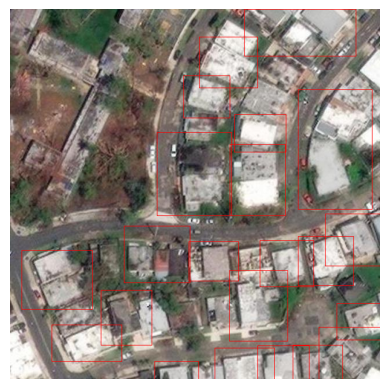

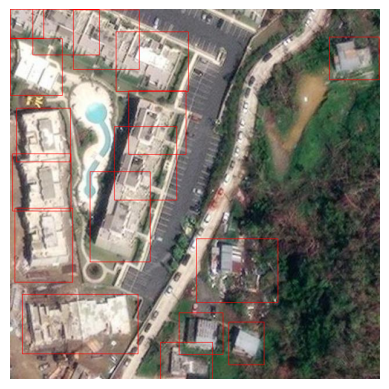

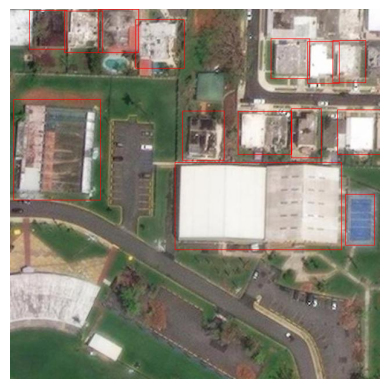

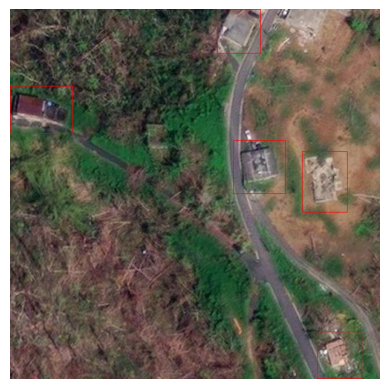

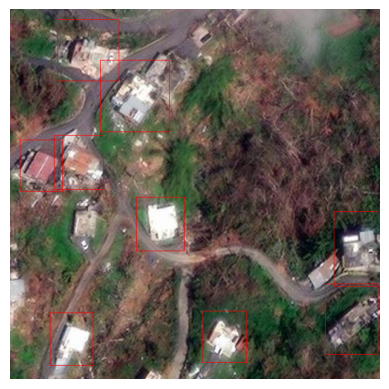

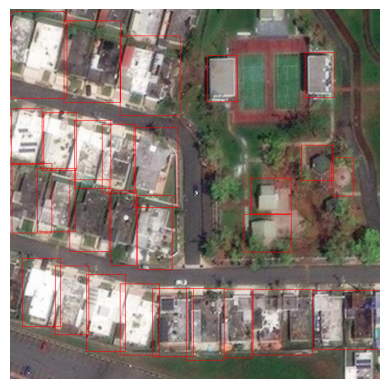

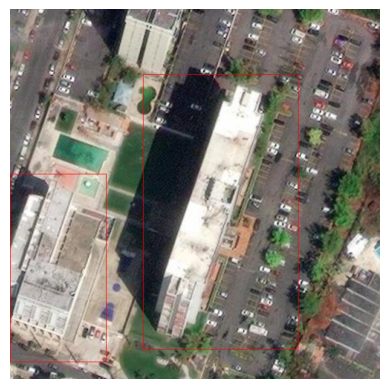

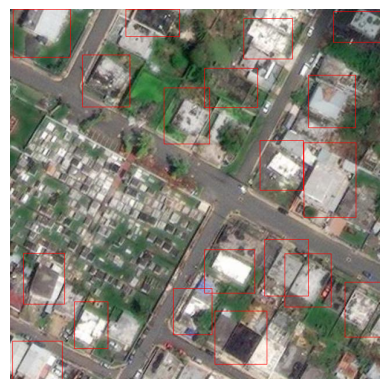

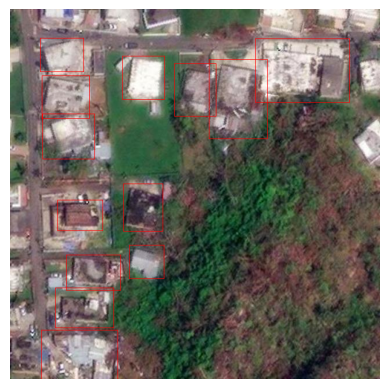

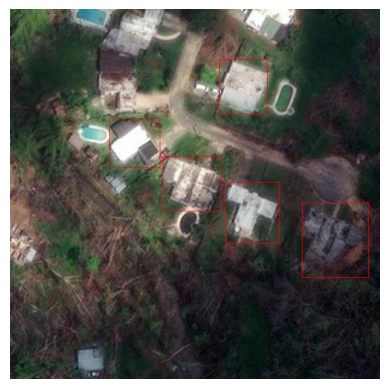

In [ ]:
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
import os

def visualize_annotation(image_path, annotation_path):
    """Visualizes YOLO format annotations on a given image by drawing rectangles."""
    image = Image.open(image_path)
    img_width, img_height = image.size
    draw = ImageDraw.Draw(image)
    with open(annotation_path, 'r') as file:
        for line in file:
            _, x_center, y_center, width, height = line.strip().split()
            # Convert normalized coordinates back to pixel coordinates
            x_center, y_center, width, height = float(x_center), float(y_center), float(width), float(height)
            x_center, y_center, width, height = (x_center * img_width, y_center * img_height, width * img_width, height * img_height)

            # Calculate top-left and bottom-right corners of the bounding box
            top_left = (x_center - width / 2, y_center - height / 2)
            bottom_right = (x_center + width / 2, y_center + height / 2)

            draw.rectangle([top_left, bottom_right], outline='red')
    plt.imshow(image)
    plt.axis('off')
    plt.show()

# Paths to the images and annotations directories dynamically built
current_dir = os.getcwd()
images_dir = os.path.join(current_dir, "given/OtherTeamData")  # Corrected path join
annotations_dir = images_dir  # Assuming annotations are in the same directory

try:
    # Select the first 10 image files for demonstration
    image_files = [f for f in os.listdir(images_dir) if f.endswith('.jpg')][:10]

    for image_file in image_files:
        annotation_file = image_file.replace('.jpg', '.txt')
        if os.path.exists(os.path.join(annotations_dir, annotation_file)):
            visualize_annotation(os.path.join(images_dir, image_file), os.path.join(annotations_dir, annotation_file))
        else:
            print(f"Annotation file does not exist for {image_file}")
except FileNotFoundError as e:
    print(f"Error: {e}")



#### Also, the image size changes halfway through the list, so be prepared to handle this